<a href="https://colab.research.google.com/github/OBB-2199/EscapeEarth/blob/main/Interns/Olivia/BLSFunctionTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://docs.astropy.org/en/stable/api/astropy.timeseries.BoxLeastSquares.html#

https://docs.astropy.org/en/stable/timeseries/bls.html

In [ ]:
import numpy as np
import astropy.units as u
from astropy.timeseries import BoxLeastSquares
np.random.seed(42)
t = np.random.uniform(0, 20, 2000)
y = np.ones_like(t) - 0.1*((t%3)<0.2) + 0.01*np.random.randn(len(t))
model = BoxLeastSquares(t * u.day, y, dy=0.01)
periodogram = model.autopower(0.2)

The transit periodogram takes as input time series observations where the timestamps t and the observations y (usually brightness) are stored as numpy arrays or Quantity objects. If known, error bars dy can also optionally be provided.

The output of the astropy.timeseries.BoxLeastSquares.autopower method is a BoxLeastSquaresResults object with several useful attributes, the most useful of which are generally the period and power attributes.




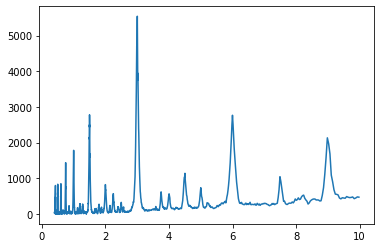

In [ ]:
import matplotlib.pyplot as plt                  
plt.plot(periodogram.period, periodogram.power)  

To compute the log likelihood of the model fit, call power or autopower with objective='snr' as follows:


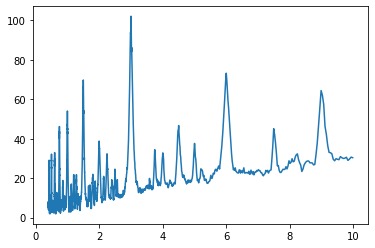

In [ ]:
model = BoxLeastSquares(t * u.day, y, dy=0.01)
periodogram = model.autopower(0.2, objective="snr")
plt.plot(periodogram.period,periodogram.power)

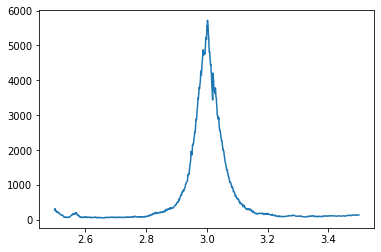

In [ ]:
model = BoxLeastSquares(t * u.day, y, dy=0.01)
periods = np.linspace(2.5, 3.5, 1000) * u.day
periodogram = model.power(periods, 0.2)
plt.plot(periodogram.period,periodogram.power)

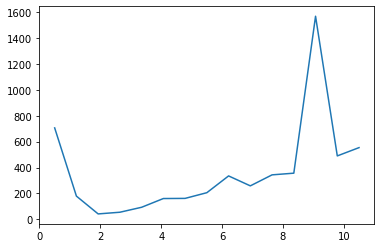

In [ ]:
model = BoxLeastSquares(t * u.day, y, dy=0.01)
periods = np.linspace(0.5, 10.5, 15) * u.day
periodogram = model.power(periods, 0.2)
plt.plot(periodogram.period,periodogram.power)

In [ ]:
model = BoxLeastSquares(t * u.day, y, dy=0.01)
periodogram = model.autopower(0.2)
max_power = np.argmax(periodogram.power)
stats = model.compute_stats(periodogram.period[max_power],
                            periodogram.duration[max_power],
                            periodogram.transit_time[max_power])

In [ ]:
def BLS(periodgrid,lightcurve,durationgrid):
  '''
  Purppose
  ------------------
  A Box Least Squares function to print out the compute stats of the periodogram.
  
  Parameters
  -------------------
  period grid            - describes how often the transit is happening (arrays different value)
  duration grid          - describes the width of the transit (array of different values)
  lightcurve             - lightkurve class object
  
  Return
  ------------------
  Calculate several statistics of a candidate transit.
  '''
  #assigning parameters to variables
  period = periodgrid
  duration = durationgrid
  lc = lightcurve 
  
  #t = timestamps
  #y = observations
  t = duration * u.day
  y = lc * u.dimensionless_unscaled

  #dy is the uncertianty
  model = BoxLeastSquares(t, y, dy= lc.flux_err) 
  periodogram = model.autopower(duration) 
  
  #calculates the max stats w/in the transit
  stats = model.compute_stats(periodogram.period[max_power],
                            periodogram.duration[max_power],
                            periodogram.transit_time[max_power])
  
  #stats is the one peak, periodogram is the areay
  return stats, periodogram